In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
df=pd.read_csv(r"C:\Users\KRISH KUMAR\Desktop\fake news\train.csv")

In [3]:
df.shape

(20800, 5)

In [4]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df['content']=df['author']+' '+df['title']
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 18285, dtype: object

In [8]:
X=df.drop(columns='label',axis=1)
Y=df['label']

In [9]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [10]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64


In [11]:
df.reset_index(inplace=True)
df.head(10)

,index,id,title,author,text,label,content
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Daniel Nussbaum Jackie Mason: Hollywood Would ...
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Alissa J. Rubin Benoît Hamon Wins French Socia...
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,Megan Twohey and Scott Shane A Back-Channel Pl...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0,Aaron Klein Obama’s Organizing for Action Part...
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0,"Chris Tomlinson BBC Comedy Sketch ""Real Housew..."


In [12]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
ps=PorterStemmer()

In [13]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
df['content'] = df['content'].apply(stemming)

In [15]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
18280    jerom hudson rapper trump poster child white s...
18281    benjamin hoffman n f l playoff schedul matchup...
18282    michael j de la merc rachel abram maci said re...
18283    alex ansari nato russia hold parallel exercis ...
18284                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object


In [16]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [17]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [18]:
print(Y)

[1 0 1 ... 0 1 1]


In [19]:
Y.shape

(18285,)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [21]:
print(X)

  (0, 14626)	0.2853880981846006
  (0, 12567)	0.25566372256502734
  (0, 8310)	0.3609049070394367
  (0, 8048)	0.29347549279156676
  (0, 7190)	0.24556189342497173
  (0, 6552)	0.21745594418933306
  (0, 4637)	0.23016077319140021
  (0, 3543)	0.2684494960336511
  (0, 3359)	0.3609049070394367
  (0, 2757)	0.2466340295002162
  (0, 2312)	0.3745612250433202
  (0, 247)	0.26982554594264346
  (1, 15663)	0.3053027963338981
  (1, 6377)	0.19285723710368197
  (1, 5140)	0.7119376870709988
  (1, 3328)	0.2623789770430963
  (1, 2619)	0.19368327535633711
  (1, 2066)	0.38191890436039194
  (1, 1764)	0.1509985164277699
  (1, 1391)	0.29617980713962144
  (2, 14560)	0.4180284001448272
  (2, 8973)	0.4948460479407663
  (2, 5579)	0.3490632212946542
  (2, 5031)	0.38709995799949964
  (2, 2895)	0.4581003415623782
  :	:
  (18282, 12239)	0.252743907968046
  (18282, 11515)	0.2748252773264482
  (18282, 11321)	0.24588400571511215
  (18282, 9605)	0.07665665104558947
  (18282, 8942)	0.1712955017712004
  (18282, 8879)	0.29296479

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, stratify=Y, random_state=2)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
acc_score=accuracy_score(Y_test,pred)
print("accuracy: %0.3f"  % acc_score)

accuracy: 0.979


In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,pred)
print(cm)

[[3321   99]
 [  30 2585]]


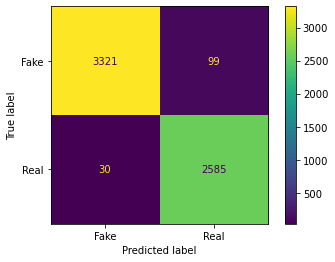

In [27]:
cmd_obj=ConfusionMatrixDisplay(cm,display_labels=['Fake','Real'])
cmd_obj.plot()

In [28]:
X_new = X_test[1043]

prediction = model.predict(X_new)
print(prediction)

if (prediction==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [29]:
print(Y_test[1043])

1
